# Contents

This is a notebook that imports the robots libraries and a bunch of useful stuff

I use this to perform explorative sessions when debugging/testing some aspects of the library

Feel free to reuse this at the exam!

(remember to use the pdm provided .venv on the top right corner of the notebook)

In [1]:
import pyrobots as pr
import numpy as np
from rich import print


In [2]:
import numpy as np

In [3]:
angle = -30

angles_rad = np.deg2rad(angle)

In [4]:
angles_rad

-0.5235987755982988

In [5]:
def is_skew_symmetric_matrix(A):
    return np.allclose(A.T, -A)

In [6]:
A = pr.rotations.direct_rot_mat(np.pi, np.array([1,0,0]))

In [7]:
O , S= pr.direct_generic(("y", "x", "y"), (np.pi/2, -np.pi/4, np.pi/4), get_symbolic=True)
R = pr.rotations.direct_rot_mat(angles_rad, np.array([1/np.sqrt(3),-1/np.sqrt(3),1/np.sqrt(3)]))

In [8]:
A = pr.rotations.gen_pitch("t")
a = A.subs({"t": np.pi/2})

In [9]:
B = pr.rotations.gen_roll("phi_1")
b = B.subs("phi_1", -np.pi/4)

In [10]:
C = pr.rotations.gen_pitch("theta_2")
c = C.subs("theta_2", np.pi/4)

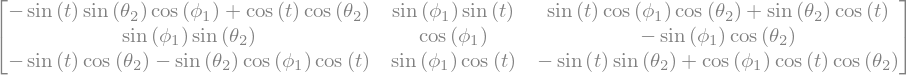

In [11]:
Z = A @ B @ C
Z

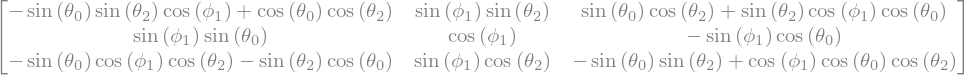

In [12]:
O , S = pr.direct_generic(("y", "x", "y"), (np.pi/2, -np.pi/4, np.pi/4), get_symbolic=True)
S

In [13]:
np.array(a @ b @ c)

array([[-0.500000000000000, -0.707106781186547, 0.500000000000000],
       [-0.500000000000000, 0.707106781186548, 0.500000000000000],
       [-0.707106781186548, -4.32978028117747e-17, -0.707106781186547]],
      dtype=object)

In [14]:
O

array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
       [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01],
       [-7.07106781e-01, -4.32978028e-17, -7.07106781e-01]])

In [15]:
Initial = np.linalg.inv(R) @ O

In [16]:
Initial

array([[-0.1161291 , -0.87965281,  0.46122116],
       [-0.34164801,  0.47140452,  0.81305253],
       [-0.93262569, -0.06315623, -0.35527542]])

In [17]:
np.linalg.det(Initial)

In [18]:
np.allclose(np.dot(R.T, R), np.eye(3))

True

In [19]:
pr.rotations.inverse_rpy(
    Initial
)

((-2.965663515564169, 1.2016222258862326, -1.898452923708797, None),
 (0.17592913802562457, 1.9399704277035608, 1.243139729880996, None))

In [20]:
Rf = np.array(
    [
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, -1]
    ]
)

Ri = np.array(
    [
        [0, 1, 0],
        [0.5, 0, np.sqrt(3)/2],
        [np.sqrt(3)/2, 0, -0.5]
    ]
)


In [21]:
res = Ri.T @ Rf

In [22]:
res

array([[ 0.       , -0.5      , -0.8660254],
       [ 1.       ,  0.       ,  0.       ],
       [ 0.       , -0.8660254,  0.5      ]])

$$\theta = 1.8235 \\
x = \begin{bmatrix}-0.4472, -0.4472, 0.7746\end{bmatrix}$$

In [23]:
ax = np.array([-0.4472, -0.4472, 0.7746])

In [24]:
np.sqrt(2)/2

In [25]:
M = np.array(
    [
        [-np.sqrt(2)/2, 0.5, -0.5, -1],
        [-np.sqrt(2)/2, -0.5, 0.5, -1],
        [0, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2],
        [0, 0, 0, 1]
    ]
)

In [26]:
M

array([[-0.70710678,  0.5       , -0.5       , -1.        ],
       [-0.70710678, -0.5       ,  0.5       , -1.        ],
       [ 0.        ,  0.70710678,  0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [38]:
# recover denavit hartenberg parameters
2
alpha = np.arctan2(M[2,1], M[2,2])
theta = np.arctan2(M[0, 1], M[0,0])
d = M[2, 3]
a = M[0, 3] * np.cos(theta) + M[1, 3] * np.sin(theta)

In [40]:
np.arctan2(M[0, 1], M[0,0])

In [44]:
M[0, 1], M[0,0]

In [43]:
- (3 * np.pi)/4

In [42]:
alpha, theta, d, a 

In [30]:
(-3 * np.pi) / 4